In [1]:
import numpy as np
from astropy.table import Table, join
import matplotlib.pyplot as plt

In [2]:
dev = Table.read('/home/aalvarez/Work/Data/SC8/SOM_Ex/develop.fits', hdu=1)
mem = Table.read('/home/aalvarez/Work/Data/SC8/SOM_Ex/f32pdz.fits', hdu=1)
bins = Table.read('/home/aalvarez/Work/Data/SC8/SOM_Ex/develop.fits', hdu=2)['BINS_PDF']

In [3]:
#dev = dev[:len(mem)]

In [4]:
all(mem['OBJECT_ID'] == dev['OBJECT_ID'])

True

In [5]:
eq = np.zeros(len(mem), dtype=np.bool_)
for i, (a, b) in enumerate(zip(dev, mem)):
    eq[i] = np.allclose(a['REDSHIFT_PDF'], b['REDSHIFT_PDF'])

In [17]:
np.sum(eq) / len(mem), np.sum(~eq), len(mem)

(0.9999890285433416, 5, 455728)

False
False
False
False
False


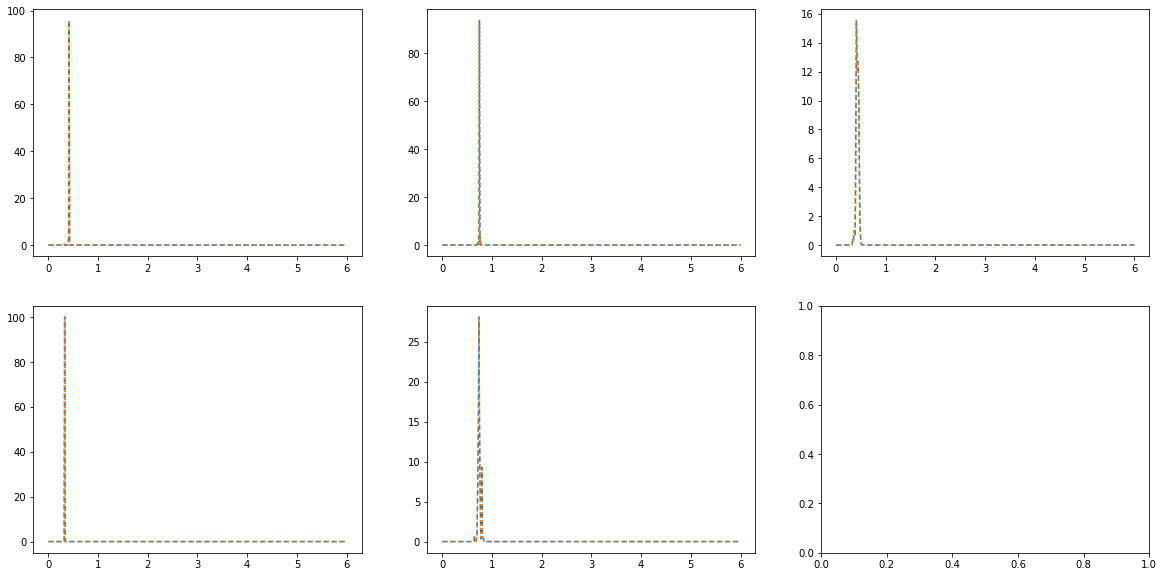

In [74]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
for d, m, ax in zip(dev[~eq]['REDSHIFT_PDF'], mem[~eq]['REDSHIFT_PDF'], axes.ravel()):
    ax.plot(bins, d, '--')
    ax.plot(bins, m, ':')
    print(np.isclose(m, d).all())

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 2.992e+03, 1.000e+01, 1.000e+00]),
 array([-5.3405762e-05, -4.6539306e-05, -3.9672850e-05, -3.2806398e-05,
        -2.5939942e-05, -1.9073486e-05, -1.2207031e-05, -5.3405761e-06,
         1.5258789e-06,  8.3923342e-06,  1.5258789e-05], dtype=float32),
 <BarContainer object of 10 artists>)

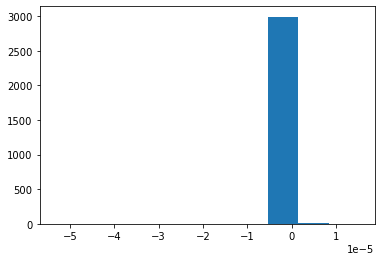

In [75]:
plt.hist(dd.ravel())